In [265]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [266]:
np.seed = 7
train_data = np.r_[np.random.normal(size=(100, 2)), np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[np.zeros(100), np.ones(100)]

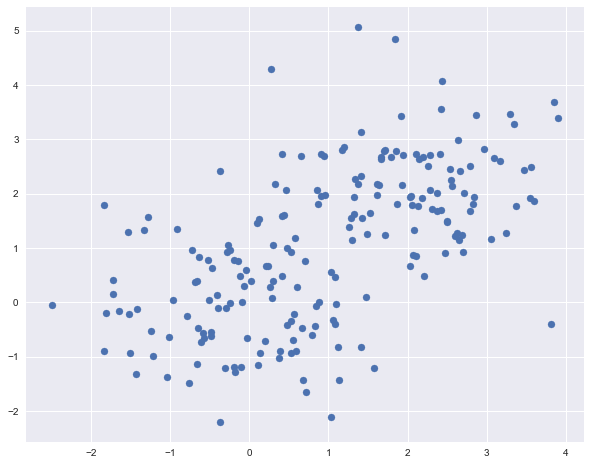

In [273]:
plt.scatter(train_data[:, 0], train_data[:, 1])
#plt.plot(range(-2,5), range(4,-3,-1))

In [274]:
from sklearn.tree import DecisionTreeClassifier

In [275]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=17)

In [276]:
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [277]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [278]:
xx, yy = get_grid(train_data[train_selection])

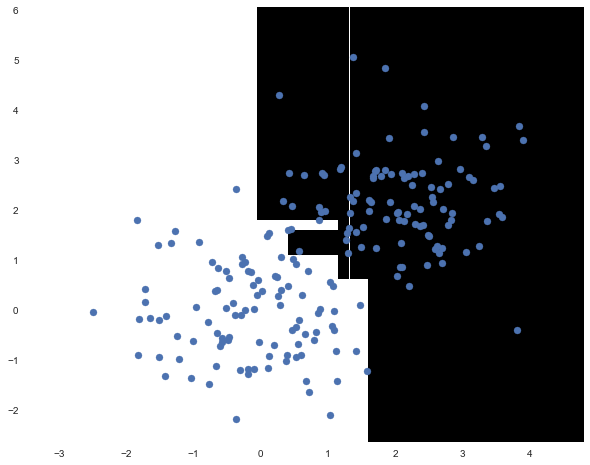

In [302]:
tree_predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, tree_predicted)
plt.scatter(train_data[:, 0], train_data[:, 1]);

In [290]:
from sklearn.tree import export_graphviz

export_graphviz(clf_tree, feature_names=['x1', 'x2'], out_file='small_tree.dot', filled=True)

#!dot -Tpng 'small_tree.dot' -o 'small_tree.png'


In [291]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=2).fit(train_data, train_labels)
clf_knn.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

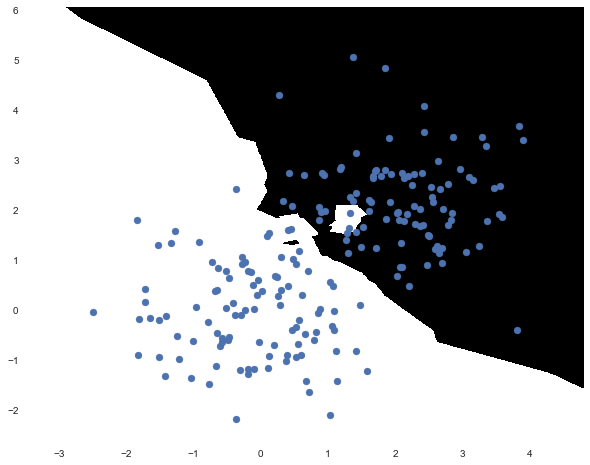

In [301]:
knn_predicted = clf_knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, knn_predicted)
plt.scatter(train_data[:, 0], train_data[:, 1]);